<a href="https://colab.research.google.com/github/abstractguy/crypto_bot/blob/master/crypto_bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cryptocurrency trading bot.

Hardcoded parameters.

In [0]:
symbol = 'ETH-BTC'
period = '60m'
interval = '1m'

Installs.

In [2]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=b7e0d64fc009e282d978acc17ade2246fd485d7b8dcc117e786874c84c7f5992
  Stored in directory: /tmp/pip-ephem-wheel-cache-ongz7zje/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


Library imports.

In [0]:
%matplotlib inline

import plotly.graph_objects as go
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

Function definitions.

In [0]:
def fill_NANs(dataframe):
    dataframe = dataframe.replace([-np.inf, np.inf], np.nan)
    dataframe.iloc[0] = dataframe.iloc[1]
    return dataframe.fillna(axis='index', method='pad')

def heikin_ashi(df):
    heikin_ashi_df = pd.DataFrame(index=df.index.values, columns=['Open', 'High', 'Low', 'Close'])
    heikin_ashi_df['Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4

    for i in range(len(df)):
        if i == 0:
            heikin_ashi_df.iat[0, 0] = df['Open'].iloc[0]
        else:
            heikin_ashi_df.iat[i, 0] = (heikin_ashi_df.iat[i - 1, 0] + heikin_ashi_df.iat[i - 1, 3]) / 2

    heikin_ashi_df['High'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['High']).max(axis=1)
    heikin_ashi_df['Low'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['Low']).min(axis=1)

    return heikin_ashi_df

Download cryptocurrency symbol data.

In [5]:
dataset_downloaded = yf.download(tickers=[symbol], 
                                 period=period, 
                                 interval=interval, 
                                 group_by='ticker', 
                                 auto_adjust=True, 
                                 prepost=True)

dataset_downloaded = fill_NANs(dataset_downloaded)
dataset_downloaded

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2020-03-17 18:18:00+00:00,0.021989,0.021989,0.021989,0.021989,0.0
2020-03-17 18:19:00+00:00,0.021989,0.021989,0.021989,0.021989,0.0
2020-03-17 18:20:00+00:00,0.021992,0.021992,0.021992,0.021992,0.0
2020-03-17 18:21:00+00:00,0.021985,0.021985,0.021985,0.021985,0.0
2020-03-17 18:22:00+00:00,0.021995,0.021995,0.021995,0.021995,1668.0
2020-03-17 18:23:00+00:00,0.022000,0.022000,0.022000,0.022000,2590.0
2020-03-17 18:24:00+00:00,0.021988,0.021988,0.021988,0.021988,0.0
2020-03-17 18:25:00+00:00,0.022026,0.022026,0.022026,0.022026,4063.0
2020-03-17 18:26:00+00:00,0.021975,0.021975,0.021975,0.021975,0.0


Download testing area -->

<-- End of download testing area.

*** To avoid downloading multiple times, restart here. ***

In [6]:
dataset = dataset_downloaded.copy()
dataset

,Open,High,Low,Close,Volume
Datetime,,,,,
2020-03-17 18:18:00+00:00,0.021989,0.021989,0.021989,0.021989,0.0
2020-03-17 18:19:00+00:00,0.021989,0.021989,0.021989,0.021989,0.0
2020-03-17 18:20:00+00:00,0.021992,0.021992,0.021992,0.021992,0.0
2020-03-17 18:21:00+00:00,0.021985,0.021985,0.021985,0.021985,0.0
2020-03-17 18:22:00+00:00,0.021995,0.021995,0.021995,0.021995,1668.0
2020-03-17 18:23:00+00:00,0.022000,0.022000,0.022000,0.022000,2590.0
2020-03-17 18:24:00+00:00,0.021988,0.021988,0.021988,0.021988,0.0
2020-03-17 18:25:00+00:00,0.022026,0.022026,0.022026,0.022026,4063.0
2020-03-17 18:26:00+00:00,0.021975,0.021975,0.021975,0.021975,0.0


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



,Open,High,Low,Close
2020-03-17 18:18:00,0.0219891,0.021989,0.021989,0.021989
2020-03-17 18:19:00,0.0219891,0.021989,0.021989,0.021989
2020-03-17 18:20:00,0.0219891,0.021992,0.021989,0.021992
2020-03-17 18:21:00,0.0219907,0.021991,0.021985,0.021985
2020-03-17 18:22:00,0.0219881,0.021995,0.021988,0.021995
2020-03-17 18:23:00,0.0219917,0.022000,0.021992,0.022000
2020-03-17 18:24:00,0.021996,0.021996,0.021988,0.021988
2020-03-17 18:25:00,0.021992,0.022026,0.021992,0.022026
2020-03-17 18:26:00,0.0220089,0.022009,0.021975,0.021975
2020-03-17 18:27:00,0.0219918,0.021992,0.021979,0.021979


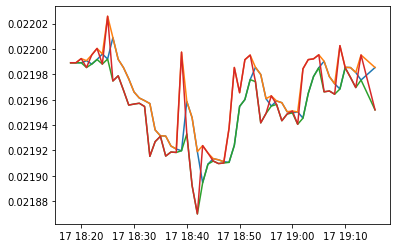

In [7]:
dataset = dataset.tz_localize(tz=None, ambiguous='infer')
heikin_ashi_dataset = heikin_ashi(dataset)
plt.plot(heikin_ashi_dataset)
heikin_ashi_dataset

In [8]:
fig = go.Figure(data=[go.Candlestick(x=heikin_ashi_dataset.index.to_series(), 
                                     open=heikin_ashi_dataset['Open'], 
                                     high=heikin_ashi_dataset['High'], 
                                     low=heikin_ashi_dataset['Low'], 
                                     close=heikin_ashi_dataset['Close'])])

fig.show()

2020-03-17 18:18:00    0
2020-03-17 18:19:00    0
2020-03-17 18:20:00    1
2020-03-17 18:21:00    0
2020-03-17 18:22:00    1
2020-03-17 18:23:00    1
2020-03-17 18:24:00    0
2020-03-17 18:25:00    1
2020-03-17 18:26:00    0
2020-03-17 18:27:00    0
2020-03-17 18:28:00    0
2020-03-17 18:29:00    0
2020-03-17 18:30:00    0
2020-03-17 18:31:00    0
2020-03-17 18:32:00    0
2020-03-17 18:33:00    0
2020-03-17 18:34:00    0
2020-03-17 18:35:00    0
2020-03-17 18:36:00    0
2020-03-17 18:37:00    0
2020-03-17 18:38:00    0
2020-03-17 18:39:00    1
2020-03-17 18:40:00    0
2020-03-17 18:41:00    0
2020-03-17 18:42:00    0
2020-03-17 18:43:00    1
2020-03-17 18:44:00    1
2020-03-17 18:45:00    0
2020-03-17 18:46:00    0
2020-03-17 18:47:00    0
2020-03-17 18:48:00    1
2020-03-17 18:49:00    1
2020-03-17 18:50:00    1
2020-03-17 18:51:00    1
2020-03-17 18:52:00    1
2020-03-17 18:53:00    0
2020-03-17 18:54:00    0
2020-03-17 18:55:00    0
2020-03-17 18:56:00    1
2020-03-17 18:57:00    0


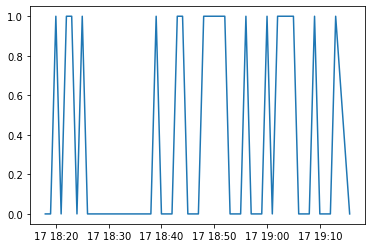

In [9]:
latent_trend = ((heikin_ashi_dataset['Close'] - heikin_ashi_dataset['Open']) > 0).astype(int)
plt.plot(latent_trend)
latent_trend

2020-03-17 18:18:00    1
2020-03-17 18:19:00    1
2020-03-17 18:20:00    1
2020-03-17 18:21:00    0
2020-03-17 18:22:00    1
2020-03-17 18:23:00    1
2020-03-17 18:24:00    0
2020-03-17 18:25:00    1
2020-03-17 18:26:00    0
2020-03-17 18:27:00    0
2020-03-17 18:28:00    0
2020-03-17 18:29:00    0
2020-03-17 18:30:00    0
2020-03-17 18:31:00    0
2020-03-17 18:32:00    0
2020-03-17 18:33:00    0
2020-03-17 18:34:00    0
2020-03-17 18:35:00    0
2020-03-17 18:36:00    0
2020-03-17 18:37:00    0
2020-03-17 18:38:00    0
2020-03-17 18:39:00    1
2020-03-17 18:40:00    0
2020-03-17 18:41:00    0
2020-03-17 18:42:00    0
2020-03-17 18:43:00    1
2020-03-17 18:44:00    1
2020-03-17 18:45:00    0
2020-03-17 18:46:00    0
2020-03-17 18:47:00    0
2020-03-17 18:48:00    1
2020-03-17 18:49:00    1
2020-03-17 18:50:00    1
2020-03-17 18:51:00    1
2020-03-17 18:52:00    1
2020-03-17 18:53:00    0
2020-03-17 18:54:00    0
2020-03-17 18:55:00    0
2020-03-17 18:56:00    1
2020-03-17 18:57:00    0


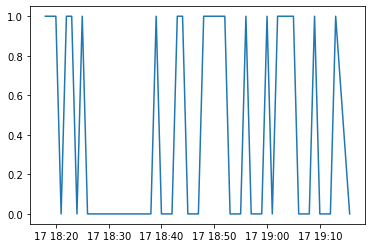

In [10]:
latest_trend = (heikin_ashi_dataset['High'] == heikin_ashi_dataset['Close']).astype(int)
plt.plot(latest_trend)
latest_trend

2020-03-17 18:18:00    0
2020-03-17 18:19:00    0
2020-03-17 18:20:00    1
2020-03-17 18:21:00    0
2020-03-17 18:22:00    1
2020-03-17 18:23:00    1
2020-03-17 18:24:00    0
2020-03-17 18:25:00    1
2020-03-17 18:26:00    0
2020-03-17 18:27:00    0
2020-03-17 18:28:00    0
2020-03-17 18:29:00    0
2020-03-17 18:30:00    0
2020-03-17 18:31:00    0
2020-03-17 18:32:00    0
2020-03-17 18:33:00    0
2020-03-17 18:34:00    0
2020-03-17 18:35:00    0
2020-03-17 18:36:00    0
2020-03-17 18:37:00    0
2020-03-17 18:38:00    0
2020-03-17 18:39:00    1
2020-03-17 18:40:00    0
2020-03-17 18:41:00    0
2020-03-17 18:42:00    0
2020-03-17 18:43:00    1
2020-03-17 18:44:00    1
2020-03-17 18:45:00    0
2020-03-17 18:46:00    0
2020-03-17 18:47:00    0
2020-03-17 18:48:00    1
2020-03-17 18:49:00    1
2020-03-17 18:50:00    1
2020-03-17 18:51:00    1
2020-03-17 18:52:00    1
2020-03-17 18:53:00    0
2020-03-17 18:54:00    0
2020-03-17 18:55:00    0
2020-03-17 18:56:00    1
2020-03-17 18:57:00    0


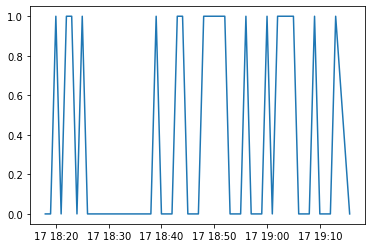

In [11]:
buy_position = latent_trend & latest_trend
plt.plot(buy_position)
buy_position

In [0]:
api_key = 'yoyoyo'
api_secret = 'yeyeye'

In [0]:
# Program supports BNB, BTC, and ETH markets only. No USDT.
from binance.client import Client
from binance.enums import *
from binance.exceptions import BinanceAPIException
from time import sleep
from sys import exit

def decimal_formatter(number):
    return format(number, '.8f')

def find_quantity(total, price):
    quantity = float(total) / float(price)
    return quantity

def calculate_price_target(initial, percentage=1.1):
    target = (percentage * float(initial) / 100) + float(initial) + 0.00000001
    return decimal_formatter(target)

def calculate_profit_percentage(initial, final):
    percent = (float(final) - float(initial)) / float(initial) * 100
    return format(percent, '.2f')

def order_confirm(symbol):
    confirm = False
    seconds = 0
    while not confirm:
    	  orders = client.get_open_orders(symbol=symbol)
    	  sleep(1)
    	  seconds += 1
    	  if not orders:
    	  	  confirm = True
    	  if seconds == 120:
    	  	  print("It's been over 2 minutes since you have placed this order. Cancel? Y/N")
    	  	  cancel = input("> ")
    	  	  if cancel.lower() == "y":
    	  	  	  orderId = orders[0]['orderId']
    	  	  	  client.cancel_order(symbol=symbol, orderId=orderId)
    	  	  	  confirm = True
    	      else:
    	  		    print("Order not cancelling. Selling...")
    	  if seconds == 300:
    	  	  print("It's been over 5 minutes since you have placed the order. ")
    	  	  print("If you stop here, your order will be sold at market value.")
    	  	  cancel2 = input('Stop? Y/N > ')
    	  	  if cancel2.lower() == "y":
    	  	  		orderId = orders[0]['orderId']
    	  	  		client.cancel_order(symbol=symbol, orderId=orderId)
    	  	  		quant = input("enter quantity: ")
    	  	  		if "." in quant:
    	  	  			  quantity = float(quant)
    	  	  		else:
    		    			  quantity = int(quant)
    		    		client.order_market_sell(symbol=symbol, quantity=quantity)
    		    		confirm = True
      	    else:
      		      print("Not cancelling. The program will run until the order is confirmed.")
    print("Order is confirmed!")


client = Client(api_key, api_secret)

print("Welcome! type 'STOP' to stop")

while True:
    print("Enter a symbol.")
    sym = input('> ')

    if sym.lower() == "stop":
        exit()

    coin = sym[:-3]
    asset = sym[-3:]

    klines = client.get_historical_klines(sym, Client.KLINE_INTERVAL_1MINUTE, "1 min ago")
    most_recent = klines.pop()
    last_closing = most_recent[4]
    print("Last close price for {} was {}".format(sym, last_closing))

    balance = client.get_asset_balance(asset=asset)
    bitcoins = float(balance['free'])
    half_bitcoins = format(bitcoins / 2.0, '.8f')

    profit = calculate_price_target(last_closing)
    print("Your profit target is", profit)

    number_of_coins = find_quantity(half_bitcoins, last_closing)
    print("Your order will be for {} with {} {}".format(last_closing, number_of_coins, coin))

    try:
    	  print('Buying...')
    	  try:
    	  	  print("Buy method 1, three decimal places")
    	  	  client.order_limit_buy(symbol=sym, quantity=float(format(number_of_coins, '.3f')), price=last_closing)
    	  except:
    	  	  try:
    	  	  	  print("Method 1 failed.")
    	  	  	  print("Buy method 2, rounded coins")
    	  	  	  client.order_limit_buy(symbol=sym, quantity=round(number_of_coins), price=last_closing)
    	  	  except BinanceAPIException:
    	  	  	  try:
    	  	  	  	  print("Method 2 failed.")
    	  	  	  	  print("Buy method 3, rounded coins but minus one")
    	  	  	  	  client.order_limit_buy(symbol=sym, quantity=round(number_of_coins - 1), price=last_closing)
    	  	  	  except:
    	  	  	  	  print("Method 3 failed.")
    	  	  	  	  print("Buy method 4, 2 decimal places")
    	  	  	  	  client.order_limit_buy(symbol=sym, quantity=float(format(number_of_coins, '.2f')), price=last_closing)
    	  sleep(1)
    	  print("Order placed. Confirming...")
    	  order_confirm(sym)
    	  print("Selling... Might take a while...")
    	  try:
    	  	  print("Sell method float quantity 1")
    	  	  client.order_limit_sell(symbol=sym, quantity=float(format(number_of_coins, '.3f')), price=str(profit))
    	  except BinanceAPIException as e:
    	  	  print("Method 1 failed.")
    	  	  print("Sell method round quantity 2")
    	  	  if "LOT_SIZE" in e.message:
    	  	  	  try:
    	  	  	  	  client.order_limit_sell(symbol=sym, quantity=round(number_of_coins), price=str(profit))
    	  	  	  except BinanceAPIException as e:
    	  	  	  	  print("Method 2 failed.")
    	  	  	  	  print(e.message)
    	  	  	  	  print("Sell method round minus one quantity 3")
    	  	  	  	  try:
    	  	  	  	  	  client.order_limit_sell(symbol=sym, quantity=round(number_of_coins - 1), price=str(profit))
    	  	  	  	  except BinanceAPIException as e:
    	  	  	  	  	  print(e.message)
    	  	  	  	  	  print("Method 3 failed.")
    	  	  	  	  	  print("Sell method float quantity 4")
    	  	  	  	  	  client.order_limit_sell(symbol=sym, quantity=float(format(number_of_coins, '.2f')), price=str(profit))
    	  	  elif "PRICE_FILTER" in e.message:
    	  	  	  try:
    	  	  	  	  print("Method 2 failed.")
    	  	  	  	  print("Sell method 7 decimal places profit 3")
    	  	  	  	  profit = format(float(profit), '.7f')
    	  	  	  	  client.order_limit_sell(symbol=sym, quantity=float(format(number_of_coins, '.3f')), price=str(profit))
    	  	  	  except:
    	  	  	  	  try:
    	  	  	  	  	  print("Method 3 failed.")
    	  	  	  	  	  print("Sell method 6 decimal places profit 4")
    	  		    	  	  profit = format(float(profit), '.6f')
    	  		    	  	  client.order_limit_sell(symbol=sym, quantity=float(format(number_of_coins, '.3f')), price=str(profit))
    	  		    	  except BinanceAPIException:
    	  		    	  	  print("Method 4 failed.")
    	  		    	  	  print("Sell method float quantity 6 decimal places 5")
    	  		    	  	  profit = format(float(profit), '.6f')
    				        	  client.order_limit_sell(symbol=sym, quantity=float(format(number_of_coins, '.2f')), price=str(profit))
    	  print("Order placed. Confirming...")
    	  sleep(1)
    	  order_confirm(sym)
    	  percentage = calculate_profit_percentage(last_closing, profit)
    	  print("Congrats! You made a profit of {}%.".format(percentage))
    except BinanceAPIException as e:
    	  print(e.status_code)
    	  print(e.message)